In [1]:
import numpy as np

A = np.array([
    [3, 1, 1],
    [1, 2, 1],
    [0, -1, 1]
])

b1 = np.array([1, 2, 3])
b2 = np.array([2, 4, 5])

In [2]:
np.linalg.solve(A, b1)

array([-0.57142857, -0.14285714,  2.85714286])

/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


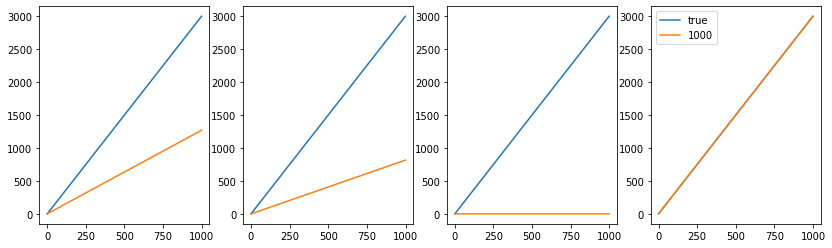

In [15]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor

a = np.arange(1000)
b = 3 * a

fig, axes = plt.subplots(1, 4, figsize=(14, 4))
for j, i in enumerate([1, 10, 100, 1000]):
    estimator = MLPRegressor(hidden_layer_sizes=(1, ), max_iter=i)
    estimator.fit(a[:, np.newaxis], b)
    axes[j].plot(a, b, label='true')
    axes[j].plot(a, estimator.predict(a[:, np.newaxis]), label=f'{i}')
plt.legend()

/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/Users/katouseimitsuru/.pyenv/versions/3.7.4/envs/machine_learning/lib/python3.7/site

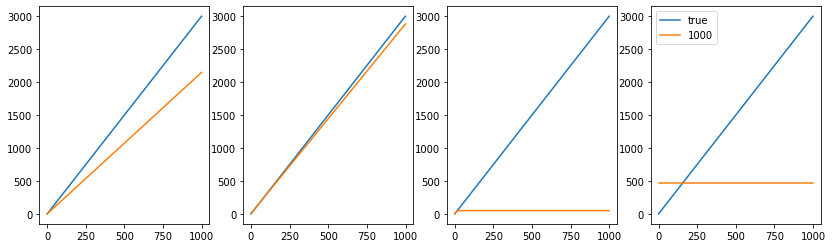

In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neural_network import MLPRegressor

a = np.arange(1000)
b = 3 * a

fig, axes = plt.subplots(1, 4, figsize=(14, 4))
for j, i in enumerate([1, 10, 100, 1000]):
    estimator = MLPRegressor(hidden_layer_sizes=(1, ), max_iter=i, learning_rate_init=0.1)
    estimator.fit(a[:, np.newaxis], b)
    axes[j].plot(a, b, label='true')
    axes[j].plot(a, estimator.predict(a[:, np.newaxis]), label=f'{i}')
plt.legend()

### Q-tableをを線形モデルで表現して学習してみる

In [19]:
import numpy as np

# 状態を表現するベクトル( x, x <= 3, 3 < x <= 7, 7 < x)
# x = 4
s = np.array([4, 0, 1, 0])

# Q-function
Q = np.zeros((s.size, 5))

# 行動評価ベクトルを返す

a = s @ Q

print(a)

[0. 0. 0. 0. 0.]


In [21]:
s.T @ s * Q

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [8]:
np.random.uniform(size = (4, 5))

(4, 5)

In [24]:
import numpy as np

b = np.array([2, 4, 5])
B = np.vstack([b] * 3).T
print(B)
B @ np.diag([1, 2, 3])

[[2 2 2]
 [4 4 4]
 [5 5 5]]


array([[ 2,  4,  6],
       [ 4,  8, 12],
       [ 5, 10, 15]])

### Experience Replayを入れないバージョンの損失関数

$ a \in \mathbb{R}^5, s \in \mathbb{R}^4, Q \in \mathbb{R}^{4 \times 5} $  
$u$を環境から得られた実際の価値とすると、近似する行動評価関数から得られるのは$u$の推定値であるから以下のように書ける  
行動評価ベクトル$$ \hat{\mathbb{u}} = f(s)$$
さらに今回はこの行動評価関数を線形モデルで近似するので以下が成り立つ$$f(s) = s^T Q  $$  
  
ここで損失関数を以下のように定義し、これを最小化するパラメータ$Q$を求める

$$
L = \frac{1}{2} \| \mathbb{u} - f(s_i)\|^2
$$

##### 線形モデルのパラメータを列ベクトル毎に微分
$u, Q$を分解して書くと  
$$ u = (u_1, u_2, u_3, u_4, u_5)$$
$$Q = (\mathbb{q_1}, \mathbb{q_2}, \mathbb{q_3}, \mathbb{q_4}, \mathbb{q_5})$$
であるから、損失関数を$Q$の列ベクトルごとに微分した$\frac{\partial L}{\partial \mathbb{q_j}}$は

$$ 
\begin{align}
    \frac{\partial L}{\partial \mathbb{q_j}} 
      &= \frac{1}{2} \{\frac {
          \partial (u_j - s^T \mathbb{q_j})^T 
        } {
          \partial \mathbb{q_j}
        } (u_j - s^T\mathbb{q_j}) + 
        (u_j - s^T\mathbb{q_j})^T  \frac{
          \partial (u - s^T \mathbb{q_j})
        } {
          \partial \mathbb{q_j}
        } \} \\
      &= \frac{1}{2} \{ -s (u_j = s^T \mathbb{q_j}) - (u_j - s^T \mathbb{q_j})^T s^T \} \\
      &= s(s^T \mathbb{q_j} - u_j) \\
\end{align}
$$

##### 行列で書く
$$
\begin{align}
\frac{\partial L}{\partial \mathbb{Q}} &= (\frac{\partial L}{\partial \mathbb{q_1}}, \frac{\partial L}{\partial \mathbb{q_2}},\frac{\partial L}{\partial \mathbb{q_3}},\frac{\partial L}{\partial \mathbb{q_4}},\frac{\partial L}{\partial \mathbb{q_5}}) \\
 &= (s(s^T \mathbb{q_1} - u_1), s(s^T \mathbb{q_2} - u_2),s(s^T \mathbb{q_3} - u_3),s(s^T \mathbb{q_4} - u_4), s(s^T \mathbb{q_5} - u_5)) \\
 &= (ss^T \mathbb{q_1} - u_1 s, ss^T \mathbb{q_2} - u_2 s, ss^T \mathbb{q_3} - u_3 s, ss^T \mathbb{q_4} - u_4 s, ss^T \mathbb{q_5} - u_5 s) \\
 &= (ss^T\mathbb{q_1}, ss^T\mathbb{q_2}, ss^T\mathbb{q_3}, ss^T\mathbb{q_4}, ss^T\mathbb{q_5}) - (u_1 s, u_2s, u_3s, u_4s, u_5s) \\
 &= s s^T (\mathbb{q_1}, \mathbb{q_2}, \mathbb{q_3}, \mathbb{q_4}, \mathbb{q_5}) - su^T \\
 &= s (s^T \mathbb{Q} - u^T))
 \end{align}
$$

### Experience Replayを導入したバージョンの損失関数

$ a \in \mathbb{R}^5, s \in \mathbb{R}^4, Q \in \mathbb{R}^{4 \times 5} $  
行動評価ベクトル$ \hat{\mathbb{u}} = (u_1, u_2, u_3, u_4, u_5) = f(s) = s^T Q = s^T (\mathbb{q_1}, \mathbb{q_2}, \mathbb{q_3}, \mathbb{q_4}, \mathbb{q_5})$  
  
ここで損失関数を以下のように定義すると

$$
L = \frac{1}{2n} \sum_{i=0}^{n - 1} \| \mathbb{u_i} - f(s_i)\|^2
$$

##### 線形モデルのパラメータを列ベクトル毎に微分
$$ 
\begin{align}
    \frac{\partial L}{\partial \mathbb{q_j}} 
      &= \frac{1}{2n}\sum_{i=0}^{n - 1} \{\frac{\partial (u_1 - s^T \mathbb{q_j})^T}{\partial \mathbb{q_j}}(u_i - s^T\mathbb{q_j}) + (u_i - s^T\mathbb{q_j})^T  \frac{\partial (u_i - s^T \mathbb{q_j})}{\partial \mathbb{q_j}}\} \\
      &= \frac{1}{2n} \sum_{i=0}^{n - 1}\{ -s(u_i = s^T \mathbb{q_j}) - (u_1 - s^T \mathbb{q_j})^T s^T \} \\
      &=\frac{1}{n} \sum_{i=0}^{n - 1} s(s^T \mathbb{q_j} - u_i) \\
\end{align}
$$

##### 行列で書く
$$
\begin{align}
\frac{\partial L}{\partial \mathbb{Q}} &= (\frac{\partial L}{\partial \mathbb{q_1}}, \frac{\partial L}{\partial \mathbb{q_2}},\frac{\partial L}{\partial \mathbb{q_3}},\frac{\partial L}{\partial \mathbb{q_4}},\frac{\partial L}{\partial \mathbb{q_5}}) \\
 &= (s(s^T \mathbb{q_1} - u_1), s(s^T \mathbb{q_2} - u_2),s(s^T \mathbb{q_3} - u_3),s(s^T \mathbb{q_4} - u_4), s(s^T \mathbb{q_5} - u_5)) \\
 &= (ss^T \mathbb{q_1} - u_1 s, ss^T \mathbb{q_2} - u_2 s, ss^T \mathbb{q_3} - u_3 s, ss^T \mathbb{q_4} - u_4 s, ss^T \mathbb{q_5} - u_5 s) \\
 &= (ss^T\mathbb{q_1}, ss^T\mathbb{q_2}, ss^T\mathbb{q_3}, ss^T\mathbb{q_4}, ss^T\mathbb{q_5}) - (u_1 s, u_2s, u_3s, u_4s, u_5s) \\
 &= s s^T (\mathbb{q_1}, \mathbb{q_2}, \mathbb{q_3}, \mathbb{q_4}, \mathbb{q_5}) - (diag(\mathbb{u}) (s, s, s, s, s)^T)^T\\
 &= \| s\|^2 \mathbb{Q} - (diag(\mathbb{u}) (s, s, s, s, s)^T)^T
 \end{align}
$$

##### 三階テンソル のブロードキャストのテスト

In [36]:
a = np.array([1, 2, 3])
B = np.array(
    [np.arange(9).reshape(3, 3)] * 3
)

print(B.shape)
print(a[:, np.newaxis, np.newaxis])
print(B)
a[:, np.newaxis, np.newaxis] * B

(3, 3, 3)
[[[1]]

 [[2]]

 [[3]]]
[[[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]

 [[0 1 2]
  [3 4 5]
  [6 7 8]]]


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 0,  2,  4],
        [ 6,  8, 10],
        [12, 14, 16]],

       [[ 0,  3,  6],
        [ 9, 12, 15],
        [18, 21, 24]]])

###### 行列とベクトルのブロードキャスト

In [39]:
import numpy as np
a = np.array([1, 2, 3])
B = np.arange(9).reshape(3, 3)

print(B)
B * a

[[0 1 2]
 [3 4 5]
 [6 7 8]]


array([[ 0,  2,  6],
       [ 3,  8, 15],
       [ 6, 14, 24]])

##### $(u_1 s, u_2s, u_3s, u_4s, u_5s)$の形になる行列の計算のテスト

In [68]:
import numpy as np
u = np.arange(2, 7)
D = np.diag(u)

In [63]:
s = np.arange(1, 5)
s

array([1, 2, 3, 4])

In [58]:
D

array([[2, 0, 0, 0, 0],
       [0, 3, 0, 0, 0],
       [0, 0, 4, 0, 0],
       [0, 0, 0, 5, 0],
       [0, 0, 0, 0, 6]])

In [64]:
np.vstack([s for _ in range(D.shape[0])])

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

In [66]:
D @ np.vstack([s for _ in range(D.shape[0])])

array([[ 2,  4,  6,  8],
       [ 3,  6,  9, 12],
       [ 4,  8, 12, 16],
       [ 5, 10, 15, 20],
       [ 6, 12, 18, 24]])

In [69]:
# これが欲しい形
(D @ np.vstack([s for _ in range(u.size)])).T

array([[ 2,  3,  4,  5,  6],
       [ 4,  6,  8, 10, 12],
       [ 6,  9, 12, 15, 18],
       [ 8, 12, 16, 20, 24]])